In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Final_Proj/Data_Redo/Models copy/cleaned_df2.csv')

In [3]:
df

,Unnamed: 0,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,0,5.125,4.210000,Ba3,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,...,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,2586.0
1,1,5.875,3.540000,Ba3,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,...,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,1705.0
2,2,3.250,3.580000,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,1858.0
3,3,4.000,3.440000,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,9740.0
4,4,6.450,2.498236,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,7488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6125,6125,4.000,4.160000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,8187.0
6126,6126,2.875,2.060000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,534.0
6127,6127,2.600,2.270000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,882.0
6128,6128,3.700,2.390000,A3,0.50,189.95,621307.0,1.180173e+08,1.180173e+08,156.79,...,887.00,4.64,4.18,1.08,19.86,33.0,7.36,6.49,37.56,2979.0


In [4]:
cols_drop = ['Unnamed: 0']
# df.drop(columns=cols_drop, inplace=True)
# names_drop = ["Names", "Ticker"]
# df.drop(columns=names_drop, inplace=True)

In [5]:
mdf = df[["Moody's Rating"]]

In [6]:
ndf = pd.read_csv('/Users/wickedbear/Coding/Projects/Final_Proj/Data_Redo/Models copy/ntr.csv')
ndf.drop(columns=cols_drop, inplace=True)

In [7]:
ndf.head()

,Moody's Rating,Names,Ticker,Name
0,Ba3,aecom,ACM,AECOM
1,Ba3,aecom,ACM,AECOM
2,A3,aflaci,AFL,AFLAC INC
3,A3,aflaci,AFL,AFLAC INC
4,A3,aflaci,AFL,AFLAC INC


In [8]:
# nmdf = pd.concat([mdf, ndf], axis=1)

In [9]:
# nmdf.head()

In [10]:
y = df["Moody's Rating"]
X = df.drop("Moody's Rating", axis=1)

In [11]:
X = pd.get_dummies(X, dummy_na=True)

In [12]:
X = pd.concat([ndf, X], axis=1)

In [13]:
X

,Moody's Rating,Names,Ticker,Name,Unnamed: 0,Coupon,Yield,Weight (%),Price,Shares,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,Ba3,aecom,ACM,AECOM,0,5.125,4.210000,0.02,47.79,119151.0,...,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,2586.0
1,Ba3,aecom,ACM,AECOM,1,5.875,3.540000,0.02,47.79,119151.0,...,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,1705.0
2,A3,aflaci,AFL,AFLAC INC,2,3.250,3.580000,0.12,52.81,543134.0,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,1858.0
3,A3,aflaci,AFL,AFLAC INC,3,4.000,3.440000,0.12,52.81,543134.0,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,9740.0
4,A3,aflaci,AFL,AFLAC INC,4,6.450,2.498236,0.12,52.81,543134.0,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,7488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6125,Baa1,ebayin,EBAY,EBAY INC,6125,4.000,4.160000,0.09,38.14,575844.0,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,8187.0
6126,Baa1,ebayin,EBAY,EBAY INC,6126,2.875,2.060000,0.09,38.14,575844.0,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,534.0
6127,Baa1,ebayin,EBAY,EBAY INC,6127,2.600,2.270000,0.09,38.14,575844.0,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,882.0
6128,A3,salesf,CRM,SALESFORCE.COM INC,6128,3.700,2.390000,0.50,189.95,621307.0,...,887.00,4.64,4.18,1.08,19.86,33.0,7.36,6.49,37.56,2979.0


In [14]:
y.head()

0    Ba3
1    Ba3
2     A3
3     A3
4     A3
Name: Moody's Rating, dtype: object

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [16]:
X_train.head()

,Moody's Rating,Names,Ticker,Name,Unnamed: 0,Coupon,Yield,Weight (%),Price,Shares,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
1672,A1,bankof,BAC,BANK OF AMERICA CORP,1672,2.050,1.85,0.91,34.85,6089264.0,...,8.84,32.05,39.07,1.15,9.11,-1.7,68.42,493.84,27.32,444.0
1284,Baa1,americ,ACC,AMERICAN CAMPUS COMMUNITIES REIT I,1284,3.400,2.69,0.02,47.96,101873.0,...,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.00,1842.0
1048,Baa1,americ,AIG,AMERICAN INTERNATIONAL GROUP INC,1048,4.200,2.83,0.14,48.48,652097.0,...,865.76,6.73,14.19,0.87,56.78,-6.3,18.20,36.08,74.93,2969.0
5724,A3,united,UPS,UNITED PARCEL SERVICE INC CLASS B,5724,2.375,2.21,0.24,105.95,521902.0,...,702.09,5.99,7.47,6.41,85.76,3.6,6.69,28.18,3.81,1644.0
3205,Baa3,genera,GD,GENERAL DYNAMICS CORP,3205,3.950,3.01,0.15,188.06,190999.0,...,289.31,8.66,11.78,5.99,134.61,7.3,3.38,15.40,46.82,1520.0


In [17]:
train_names = X_train[["Moody's Rating", "Names", "Ticker", "Name"]]

In [18]:
test_names = X_test[["Moody's Rating", "Names", "Ticker", "Name"]]

In [19]:
drop = ["Moody's Rating", "Names", "Ticker", "Name", "Unnamed: 0"]

In [20]:
X

,Moody's Rating,Names,Ticker,Name,Unnamed: 0,Coupon,Yield,Weight (%),Price,Shares,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,Ba3,aecom,ACM,AECOM,0,5.125,4.210000,0.02,47.79,119151.0,...,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,2586.0
1,Ba3,aecom,ACM,AECOM,1,5.875,3.540000,0.02,47.79,119151.0,...,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,1705.0
2,A3,aflaci,AFL,AFLAC INC,2,3.250,3.580000,0.12,52.81,543134.0,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,1858.0
3,A3,aflaci,AFL,AFLAC INC,3,4.000,3.440000,0.12,52.81,543134.0,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,9740.0
4,A3,aflaci,AFL,AFLAC INC,4,6.450,2.498236,0.12,52.81,543134.0,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,7488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6125,Baa1,ebayin,EBAY,EBAY INC,6125,4.000,4.160000,0.09,38.14,575844.0,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,8187.0
6126,Baa1,ebayin,EBAY,EBAY INC,6126,2.875,2.060000,0.09,38.14,575844.0,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,534.0
6127,Baa1,ebayin,EBAY,EBAY INC,6127,2.600,2.270000,0.09,38.14,575844.0,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,882.0
6128,A3,salesf,CRM,SALESFORCE.COM INC,6128,3.700,2.390000,0.50,189.95,621307.0,...,887.00,4.64,4.18,1.08,19.86,33.0,7.36,6.49,37.56,2979.0


In [21]:
X_train.drop(columns=drop, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
X_test.drop(columns=drop, inplace=True)

In [23]:
X_train

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
1672,2.050,1.850000,0.91,34.85,6089264.0,2.122109e+08,2.122109e+08,256.36,10.68,8.95,...,8.84,32.05,39.07,1.15,9.11,-1.7,68.42,493.84,27.32,444.0
1284,3.400,2.690000,0.02,47.96,101873.0,4.885829e+06,4.885829e+06,6.05,73.37,60.30,...,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.00,1842.0
1048,4.200,2.830000,0.14,48.48,652097.0,3.161366e+07,3.161366e+07,37.10,11.44,8.21,...,865.76,6.73,14.19,0.87,56.78,-6.3,18.20,36.08,74.93,2969.0
5724,2.375,2.210000,0.24,105.95,521902.0,5.529552e+07,5.529552e+07,79.62,18.15,10.91,...,702.09,5.99,7.47,6.41,85.76,3.6,6.69,28.18,3.81,1644.0
3205,3.950,3.010000,0.15,188.06,190999.0,3.591927e+07,3.591927e+07,47.74,14.30,12.03,...,289.31,8.66,11.78,5.99,134.61,7.3,3.38,15.40,46.82,1520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,3.450,3.250000,0.08,139.32,136548.0,1.902387e+07,1.902387e+07,23.68,38.15,30.93,...,180.78,17.20,33.79,3.47,19.94,6.1,0.38,9.56,33.85,579.0
2514,4.000,2.760000,0.07,88.68,176053.0,1.561238e+07,1.561238e+07,20.01,0.00,15.98,...,236.66,-6.82,6.83,5.51,98.91,3.7,1.83,10.11,25.86,1917.0
3606,7.300,4.570000,0.05,43.19,289464.0,1.250195e+07,1.250195e+07,14.99,12.45,12.53,...,392.12,5.47,10.68,4.45,56.60,-7.6,1.30,10.20,19.67,7214.0
5704,1.950,2.030000,0.90,298.78,707073.0,2.112593e+08,2.112593e+08,259.06,19.06,14.40,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,244.0


In [24]:
X_test

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
834,2.4866,2.380000,0.02,47.96,101873.0,4.885829e+06,4.885829e+06,6.05,73.37,60.30,...,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.00,864.0
5284,4.8750,4.290000,0.90,298.78,707073.0,2.112593e+08,2.112593e+08,259.06,19.06,14.40,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,2892.0
1561,2.4791,3.010000,0.12,45.90,613551.0,2.816199e+07,2.816199e+07,36.46,9.08,9.02,...,922.20,26.94,34.60,1.20,17.55,19.4,175.52,67.78,42.12,523.0
5308,6.5000,4.880000,0.90,298.78,707073.0,2.112593e+08,2.112593e+08,259.06,19.06,14.40,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,2496.0
4566,2.3750,2.070000,0.44,88.50,1162225.0,1.028569e+08,1.028569e+08,132.21,18.43,14.00,...,1.56,24.11,36.45,16.42,19.17,2.9,4.41,31.81,-7.44,915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,4.3290,2.498236,0.77,58.51,3097266.0,1.812210e+08,1.812210e+08,237.07,12.33,11.15,...,4.14,14.61,23.90,7.08,31.87,1.4,0.63,133.92,14.85,3142.0
3200,2.7779,3.180000,0.36,12.83,6475032.0,8.307466e+07,8.307466e+07,97.98,0.00,14.75,...,8.73,-5.23,6.76,1.39,10.91,-1.0,1.66,94.04,3.24,59.0
2495,6.3500,2.498236,0.03,28.73,252133.0,7.243781e+06,7.243781e+06,13.26,10.16,6.02,...,360.66,18.57,29.46,6.19,17.27,2.3,2.27,16.37,14.26,7413.0
5458,4.4500,3.150000,0.90,298.78,707073.0,2.112593e+08,2.112593e+08,259.06,19.06,14.40,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,6850.0


In [25]:
y_train.head()

1672      A1
1284    Baa1
1048    Baa1
5724      A3
3205    Baa3
Name: Moody's Rating, dtype: object

In [26]:
knn = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)

In [27]:
accuracy = knn.score(X_train, y_train) 
print(accuracy) 

0.7119860778768762


In [28]:
knn_predictions_train = knn.predict(X_train)  
cm = confusion_matrix(y_train, knn_predictions_train) 
knn_predictions_train

array(['A2', 'Baa1', 'Baa3', ..., 'A2', 'A3', 'Aa3'], dtype=object)

In [29]:
train_preds = pd.DataFrame(knn_predictions_train)

In [30]:
train_preds.head()

,0
0,A2
1,Baa1
2,Baa3
3,A3
4,Baa3


In [31]:
r = list(knn_predictions_train)

In [32]:
X_train

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
1672,2.050,1.850000,0.91,34.85,6089264.0,2.122109e+08,2.122109e+08,256.36,10.68,8.95,...,8.84,32.05,39.07,1.15,9.11,-1.7,68.42,493.84,27.32,444.0
1284,3.400,2.690000,0.02,47.96,101873.0,4.885829e+06,4.885829e+06,6.05,73.37,60.30,...,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.00,1842.0
1048,4.200,2.830000,0.14,48.48,652097.0,3.161366e+07,3.161366e+07,37.10,11.44,8.21,...,865.76,6.73,14.19,0.87,56.78,-6.3,18.20,36.08,74.93,2969.0
5724,2.375,2.210000,0.24,105.95,521902.0,5.529552e+07,5.529552e+07,79.62,18.15,10.91,...,702.09,5.99,7.47,6.41,85.76,3.6,6.69,28.18,3.81,1644.0
3205,3.950,3.010000,0.15,188.06,190999.0,3.591927e+07,3.591927e+07,47.74,14.30,12.03,...,289.31,8.66,11.78,5.99,134.61,7.3,3.38,15.40,46.82,1520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,3.450,3.250000,0.08,139.32,136548.0,1.902387e+07,1.902387e+07,23.68,38.15,30.93,...,180.78,17.20,33.79,3.47,19.94,6.1,0.38,9.56,33.85,579.0
2514,4.000,2.760000,0.07,88.68,176053.0,1.561238e+07,1.561238e+07,20.01,0.00,15.98,...,236.66,-6.82,6.83,5.51,98.91,3.7,1.83,10.11,25.86,1917.0
3606,7.300,4.570000,0.05,43.19,289464.0,1.250195e+07,1.250195e+07,14.99,12.45,12.53,...,392.12,5.47,10.68,4.45,56.60,-7.6,1.30,10.20,19.67,7214.0
5704,1.950,2.030000,0.90,298.78,707073.0,2.112593e+08,2.112593e+08,259.06,19.06,14.40,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,244.0


In [33]:
xi = X_train.index

In [34]:
train_preds = train_preds.set_index(xi)

In [35]:
train_preds

,0
1672,A2
1284,Baa1
1048,Baa3
5724,A3
3205,Baa3
...,...
1099,A3
2514,Baa2
3606,A2
5704,A3


In [36]:
X_train_res = pd.concat([train_names, X_train], axis=1)

In [37]:
X_train_res

,Moody's Rating,Names,Ticker,Name,Coupon,Yield,Weight (%),Price,Shares,Market Value,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
1672,A1,bankof,BAC,BANK OF AMERICA CORP,2.050,1.850000,0.91,34.85,6089264.0,2.122109e+08,...,8.84,32.05,39.07,1.15,9.11,-1.7,68.42,493.84,27.32,444.0
1284,Baa1,americ,ACC,AMERICAN CAMPUS COMMUNITIES REIT I,3.400,2.690000,0.02,47.96,101873.0,4.885829e+06,...,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.00,1842.0
1048,Baa1,americ,AIG,AMERICAN INTERNATIONAL GROUP INC,4.200,2.830000,0.14,48.48,652097.0,3.161366e+07,...,865.76,6.73,14.19,0.87,56.78,-6.3,18.20,36.08,74.93,2969.0
5724,A3,united,UPS,UNITED PARCEL SERVICE INC CLASS B,2.375,2.210000,0.24,105.95,521902.0,5.529552e+07,...,702.09,5.99,7.47,6.41,85.76,3.6,6.69,28.18,3.81,1644.0
3205,Baa3,genera,GD,GENERAL DYNAMICS CORP,3.950,3.010000,0.15,188.06,190999.0,3.591927e+07,...,289.31,8.66,11.78,5.99,134.61,7.3,3.38,15.40,46.82,1520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Baa3,americ,AWK,AMERICAN WATER WORKS INC,3.450,3.250000,0.08,139.32,136548.0,1.902387e+07,...,180.78,17.20,33.79,3.47,19.94,6.1,0.38,9.56,33.85,579.0
2514,Baa3,dollar,DLTR,DOLLAR TREE INC,4.000,2.760000,0.07,88.68,176053.0,1.561238e+07,...,236.66,-6.82,6.83,5.51,98.91,3.7,1.83,10.11,25.86,1917.0
3606,Baa2,intern,IP,INTERNATIONAL PAPER,7.300,4.570000,0.05,43.19,289464.0,1.250195e+07,...,392.12,5.47,10.68,4.45,56.60,-7.6,1.30,10.20,19.67,7214.0
5704,A3,united,UNH,UNITEDHEALTH GROUP INC,1.950,2.030000,0.90,298.78,707073.0,2.112593e+08,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,244.0


In [38]:
X_train_fin = pd.concat([train_preds, X_train_res], axis=1)

In [39]:
X_train_fin

,0,Moody's Rating,Names,Ticker,Name,Coupon,Yield,Weight (%),Price,Shares,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
1672,A2,A1,bankof,BAC,BANK OF AMERICA CORP,2.050,1.850000,0.91,34.85,6089264.0,...,8.84,32.05,39.07,1.15,9.11,-1.7,68.42,493.84,27.32,444.0
1284,Baa1,Baa1,americ,ACC,AMERICAN CAMPUS COMMUNITIES REIT I,3.400,2.690000,0.02,47.96,101873.0,...,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.00,1842.0
1048,Baa3,Baa1,americ,AIG,AMERICAN INTERNATIONAL GROUP INC,4.200,2.830000,0.14,48.48,652097.0,...,865.76,6.73,14.19,0.87,56.78,-6.3,18.20,36.08,74.93,2969.0
5724,A3,A3,united,UPS,UNITED PARCEL SERVICE INC CLASS B,2.375,2.210000,0.24,105.95,521902.0,...,702.09,5.99,7.47,6.41,85.76,3.6,6.69,28.18,3.81,1644.0
3205,Baa3,Baa3,genera,GD,GENERAL DYNAMICS CORP,3.950,3.010000,0.15,188.06,190999.0,...,289.31,8.66,11.78,5.99,134.61,7.3,3.38,15.40,46.82,1520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,A3,Baa3,americ,AWK,AMERICAN WATER WORKS INC,3.450,3.250000,0.08,139.32,136548.0,...,180.78,17.20,33.79,3.47,19.94,6.1,0.38,9.56,33.85,579.0
2514,Baa2,Baa3,dollar,DLTR,DOLLAR TREE INC,4.000,2.760000,0.07,88.68,176053.0,...,236.66,-6.82,6.83,5.51,98.91,3.7,1.83,10.11,25.86,1917.0
3606,A2,Baa2,intern,IP,INTERNATIONAL PAPER,7.300,4.570000,0.05,43.19,289464.0,...,392.12,5.47,10.68,4.45,56.60,-7.6,1.30,10.20,19.67,7214.0
5704,A3,A3,united,UNH,UNITEDHEALTH GROUP INC,1.950,2.030000,0.90,298.78,707073.0,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,244.0


In [40]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn_cv = KNeighborsClassifier(n_neighbors=15)

cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.56479482 0.60086768 0.62106406 0.58406114 0.61184211]
cv_scores mean:0.5965259593622567


In [41]:
knnt = KNeighborsClassifier(n_neighbors = 16).fit(X_test, y_test)

In [42]:
accuracy2 = knnt.score(X_test, y_test) 
print(accuracy2) 

0.6340508806262231


In [43]:
knn_predictions_test = knnt.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions_test) 
knn_predictions_test

array(['A2', 'A3', 'A2', ..., 'Baa3', 'A3', 'Aaa'], dtype=object)

In [44]:
test_preds = pd.DataFrame(knn_predictions_test)

In [45]:
test_preds.head()

,0
0,A2
1,A3
2,A2
3,Ba3
4,A2


In [46]:
X_test

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
834,2.4866,2.380000,0.02,47.96,101873.0,4.885829e+06,4.885829e+06,6.05,73.37,60.30,...,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.00,864.0
5284,4.8750,4.290000,0.90,298.78,707073.0,2.112593e+08,2.112593e+08,259.06,19.06,14.40,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,2892.0
1561,2.4791,3.010000,0.12,45.90,613551.0,2.816199e+07,2.816199e+07,36.46,9.08,9.02,...,922.20,26.94,34.60,1.20,17.55,19.4,175.52,67.78,42.12,523.0
5308,6.5000,4.880000,0.90,298.78,707073.0,2.112593e+08,2.112593e+08,259.06,19.06,14.40,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,2496.0
4566,2.3750,2.070000,0.44,88.50,1162225.0,1.028569e+08,1.028569e+08,132.21,18.43,14.00,...,1.56,24.11,36.45,16.42,19.17,2.9,4.41,31.81,-7.44,915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,4.3290,2.498236,0.77,58.51,3097266.0,1.812210e+08,1.812210e+08,237.07,12.33,11.15,...,4.14,14.61,23.90,7.08,31.87,1.4,0.63,133.92,14.85,3142.0
3200,2.7779,3.180000,0.36,12.83,6475032.0,8.307466e+07,8.307466e+07,97.98,0.00,14.75,...,8.73,-5.23,6.76,1.39,10.91,-1.0,1.66,94.04,3.24,59.0
2495,6.3500,2.498236,0.03,28.73,252133.0,7.243781e+06,7.243781e+06,13.26,10.16,6.02,...,360.66,18.57,29.46,6.19,17.27,2.3,2.27,16.37,14.26,7413.0
5458,4.4500,3.150000,0.90,298.78,707073.0,2.112593e+08,2.112593e+08,259.06,19.06,14.40,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,6850.0


In [47]:
xi2 = X_test.index

In [48]:
test_preds = test_preds.set_index(xi2)

In [49]:
test_preds

,0
834,A2
5284,A3
1561,A2
5308,Ba3
4566,A2
...,...
5838,Baa1
3200,Baa3
2495,Baa3
5458,A3


In [50]:
X_test_res = pd.concat([test_names, X_test], axis=1)

In [51]:
X_test_res

,Moody's Rating,Names,Ticker,Name,Coupon,Yield,Weight (%),Price,Shares,Market Value,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
834,A2,americ,ACC,AMERICAN CAMPUS COMMUNITIES REIT I,2.4866,2.380000,0.02,47.96,101873.0,4.885829e+06,...,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.00,864.0
5284,Ba3,united,UNH,UNITEDHEALTH GROUP INC,4.8750,4.290000,0.90,298.78,707073.0,2.112593e+08,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,2892.0
1561,A2,bankof,BK,BANK OF NEW YORK MELLON CORP,2.4791,3.010000,0.12,45.90,613551.0,2.816199e+07,...,922.20,26.94,34.60,1.20,17.55,19.4,175.52,67.78,42.12,523.0
5308,Ba3,united,UNH,UNITEDHEALTH GROUP INC,6.5000,4.880000,0.90,298.78,707073.0,2.112593e+08,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,2496.0
4566,A2,philip,PM,PHILIP MORRIS INTERNATIONAL INC,2.3750,2.070000,0.44,88.50,1162225.0,1.028569e+08,...,1.56,24.11,36.45,16.42,19.17,2.9,4.41,31.81,-7.44,915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,Baa1,verizo,VZ,VERIZON COMMUNICATIONS INC,4.3290,2.498236,0.77,58.51,3097266.0,1.812210e+08,...,4.14,14.61,23.90,7.08,31.87,1.4,0.63,133.92,14.85,3142.0
3200,Baa3,genera,GE,GENERAL ELECTRIC,2.7779,3.180000,0.36,12.83,6475032.0,8.307466e+07,...,8.73,-5.23,6.76,1.39,10.91,-1.0,1.66,94.04,3.24,59.0
2495,Baa3,discov,DISCK,DISCOVERY INC SERIES C,6.3500,2.498236,0.03,28.73,252133.0,7.243781e+06,...,360.66,18.57,29.46,6.19,17.27,2.3,2.27,16.37,14.26,7413.0
5458,Baa1,united,UNH,UNITEDHEALTH GROUP INC,4.4500,3.150000,0.90,298.78,707073.0,2.112593e+08,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,6850.0


In [52]:
X_test_fin = pd.concat([test_preds, X_test_res], axis=1)

In [53]:
X_test_fin

,0,Moody's Rating,Names,Ticker,Name,Coupon,Yield,Weight (%),Price,Shares,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
834,A2,A2,americ,ACC,AMERICAN CAMPUS COMMUNITIES REIT I,2.4866,2.380000,0.02,47.96,101873.0,...,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.00,864.0
5284,A3,Ba3,united,UNH,UNITEDHEALTH GROUP INC,4.8750,4.290000,0.90,298.78,707073.0,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,2892.0
1561,A2,A2,bankof,BK,BANK OF NEW YORK MELLON CORP,2.4791,3.010000,0.12,45.90,613551.0,...,922.20,26.94,34.60,1.20,17.55,19.4,175.52,67.78,42.12,523.0
5308,Ba3,Ba3,united,UNH,UNITEDHEALTH GROUP INC,6.5000,4.880000,0.90,298.78,707073.0,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,2496.0
4566,A2,A2,philip,PM,PHILIP MORRIS INTERNATIONAL INC,2.3750,2.070000,0.44,88.50,1162225.0,...,1.56,24.11,36.45,16.42,19.17,2.9,4.41,31.81,-7.44,915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,Baa1,Baa1,verizo,VZ,VERIZON COMMUNICATIONS INC,4.3290,2.498236,0.77,58.51,3097266.0,...,4.14,14.61,23.90,7.08,31.87,1.4,0.63,133.92,14.85,3142.0
3200,Baa3,Baa3,genera,GE,GENERAL ELECTRIC,2.7779,3.180000,0.36,12.83,6475032.0,...,8.73,-5.23,6.76,1.39,10.91,-1.0,1.66,94.04,3.24,59.0
2495,Baa3,Baa3,discov,DISCK,DISCOVERY INC SERIES C,6.3500,2.498236,0.03,28.73,252133.0,...,360.66,18.57,29.46,6.19,17.27,2.3,2.27,16.37,14.26,7413.0
5458,A3,Baa1,united,UNH,UNITEDHEALTH GROUP INC,4.4500,3.150000,0.90,298.78,707073.0,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,6850.0


In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn_cv = KNeighborsClassifier(n_neighbors=16)

cv_scores = cross_val_score(knn_cv, X_test, y_test, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.40894569 0.43870968 0.51791531 0.46864686 0.45666667]
cv_scores mean:0.4581768410239405


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [55]:
fin_df = X_test_fin.append(X_train_fin)

In [56]:
fin_df

,0,Moody's Rating,Names,Ticker,Name,Coupon,Yield,Weight (%),Price,Shares,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
834,A2,A2,americ,ACC,AMERICAN CAMPUS COMMUNITIES REIT I,2.4866,2.380000,0.02,47.96,101873.0,...,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.00,864.0
5284,A3,Ba3,united,UNH,UNITEDHEALTH GROUP INC,4.8750,4.290000,0.90,298.78,707073.0,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,2892.0
1561,A2,A2,bankof,BK,BANK OF NEW YORK MELLON CORP,2.4791,3.010000,0.12,45.90,613551.0,...,922.20,26.94,34.60,1.20,17.55,19.4,175.52,67.78,42.12,523.0
5308,Ba3,Ba3,united,UNH,UNITEDHEALTH GROUP INC,6.5000,4.880000,0.90,298.78,707073.0,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,2496.0
4566,A2,A2,philip,PM,PHILIP MORRIS INTERNATIONAL INC,2.3750,2.070000,0.44,88.50,1162225.0,...,1.56,24.11,36.45,16.42,19.17,2.9,4.41,31.81,-7.44,915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,A3,Baa3,americ,AWK,AMERICAN WATER WORKS INC,3.4500,3.250000,0.08,139.32,136548.0,...,180.78,17.20,33.79,3.47,19.94,6.1,0.38,9.56,33.85,579.0
2514,Baa2,Baa3,dollar,DLTR,DOLLAR TREE INC,4.0000,2.760000,0.07,88.68,176053.0,...,236.66,-6.82,6.83,5.51,98.91,3.7,1.83,10.11,25.86,1917.0
3606,A2,Baa2,intern,IP,INTERNATIONAL PAPER,7.3000,4.570000,0.05,43.19,289464.0,...,392.12,5.47,10.68,4.45,56.60,-7.6,1.30,10.20,19.67,7214.0
5704,A3,A3,united,UNH,UNITEDHEALTH GROUP INC,1.9500,2.030000,0.90,298.78,707073.0,...,947.41,5.72,8.13,7.55,254.63,4.3,15.02,44.64,60.78,244.0


In [59]:
classes = list(fin_df["Moody's Rating"].unique())

In [62]:
classes

['A2',
 'Ba3',
 'Baa2',
 'Ba1',
 'Baa3',
 'A3',
 'Baa1',
 'B2',
 'A1',
 'Aa3',
 'Aa2',
 'Aaa',
 'Ba2',
 'B3',
 'Aa1',
 'B1']

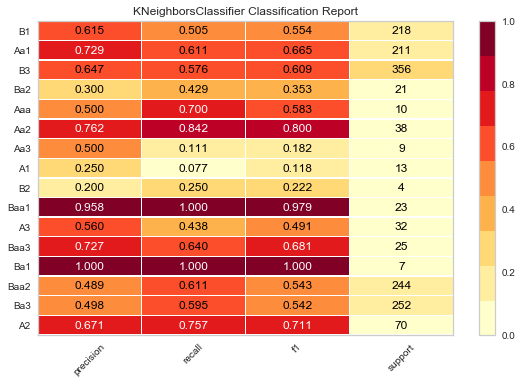

In [61]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(knn_cv, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

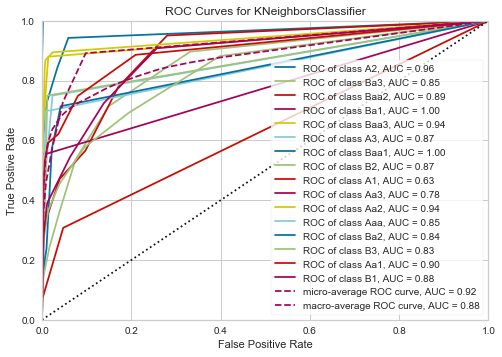

In [63]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn_cv, classes=classes)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

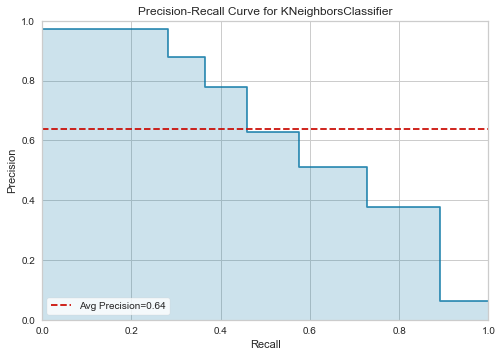

In [66]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(knn_cv)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

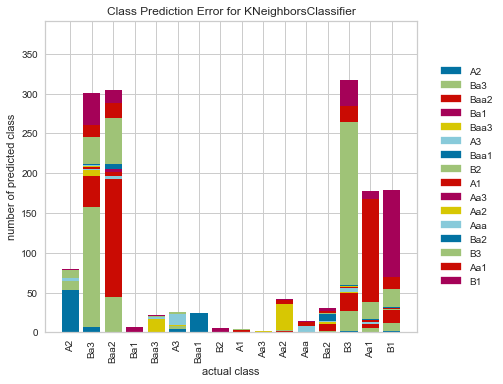

In [67]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(knn_cv, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()